# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

     |████████████████████████████████| 23.9 MB 14 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter


## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
print(df_hh_income)
print(df_pct_poverty)
print(df_pct_completed_hs)
print(df_share_race_city)
print(df_fatalities)


      Geographic Area                    City Median Income
0                  AL              Abanda CDP         11207
1                  AL          Abbeville city         25615
2                  AL         Adamsville city         42575
3                  AL            Addison town         37083
4                  AL              Akron town         21667
...               ...                     ...           ...
29317              WY  Woods Landing-Jelm CDP           NaN
29318              WY            Worland city         41523
29319              WY             Wright town         77114
29320              WY              Yoder town         37500
29321              WY           Y-O Ranch CDP           NaN

[29322 rows x 3 columns]
      Geographic Area                    City poverty_rate
0                  AL              Abanda CDP         78.8
1                  AL          Abbeville city         29.1
2                  AL         Adamsville city         25.5
3                 

In [6]:
df_share_race_city.columns

Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')

In [7]:
df_fatalities 
print(df_fatalities.state.value_counts())
df_pct_poverty['Geographic Area'].value_counts()

CA    424
TX    225
FL    154
AZ    118
OH     79
OK     78
CO     74
GA     70
NC     69
MO     64
IL     62
WA     62
TN     59
LA     57
PA     51
NM     51
AL     50
VA     47
NY     45
SC     44
WI     43
KY     43
IN     43
NV     42
MD     38
OR     38
MI     37
NJ     35
MN     32
WV     27
AR     26
KS     24
UT     23
MS     23
MA     22
ID     17
NE     15
AK     15
ME     13
IA     12
HI     11
MT     11
DC     11
SD     10
CT      9
WY      8
DE      8
NH      7
ND      4
VT      3
RI      2
Name: state, dtype: int64


PA    1762
TX    1747
CA    1522
IL    1368
OH    1215
NY    1196
MO    1033
IA    1008
FL     918
MN     903
WI     777
OK     743
NC     739
MI     692
IN     680
KS     672
WA     627
GA     627
VA     593
AL     585
NE     580
NJ     545
AR     541
KY     540
MD     518
LA     474
CO     458
AZ     451
NM     443
TN     430
WV     405
ND     401
SC     396
SD     391
OR     377
MT     365
MS     362
AK     355
UT     325
MA     246
ID     227
WY     204
HI     151
CT     144
NV     131
ME     130
VT     121
NH      97
DE      77
RI      36
DC       1
Name: Geographic Area, dtype: int64

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [8]:
df_fatalities.isna().values.any()
df_fatalities.duplicated().values.any()
df_fatalities.fillna(0, inplace=True)

In [9]:
df_hh_income.isna().values.any()
df_hh_income.duplicated().values.any()
df_hh_income.fillna(0, inplace=True)

In [10]:
df_pct_completed_hs.isna().values.any()
df_pct_completed_hs.duplicated().values.any()
df_pct_completed_hs.fillna(0, inplace=True)

In [11]:
df_pct_poverty.isna().values.any()
df_pct_poverty.duplicated().values.any()
df_pct_poverty.fillna(0, inplace=True)

In [12]:
df_share_race_city.isna().values.any()
df_share_race_city.duplicated().values.any()
df_share_race_city.fillna(0, inplace=True)

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [13]:
# df_pct_poverty.info()
# df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty.poverty_rate)
# df_pct_poverty.info()
df_pct_poverty['poverty_rate'][573]
df_pct_poverty['poverty_rate'] = df_pct_poverty['poverty_rate'].astype(str).str.replace('-','0')
# df_pct_poverty['poverty_rate'] = pd.to_numeric( df_pct_poverty['poverty_rate'].str )
# df_pct_poverty 

In [14]:
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'])

In [15]:
data = df_pct_poverty.groupby('Geographic Area').sum().poverty_rate.sort_values(ascending = False)
data 

Geographic Area
TX   34,059.90
CA   25,704.10
PA   22,002.40
MO   20,588.40
IL   18,945.90
OH   18,014.40
FL   16,072.90
OK   15,265.60
GA   14,837.10
NC   14,573.50
NY   13,920.20
AR   12,423.10
MN   12,412.40
MI   12,387.30
IA   12,329.40
AL   12,057.90
AZ   11,395.90
KY   10,843.20
LA   10,566.30
IN   10,539.90
WI    9,991.20
NM    9,970.90
KS    9,891.20
MS    9,732.10
WA    9,295.90
SC    8,753.80
VA    8,649.40
TN    8,551.50
WV    8,538.30
NE    7,492.10
AK    6,630.90
OR    6,196.30
SD    6,156.40
CO    6,040.00
MT    5,994.50
MD    5,321.10
ND    4,864.90
NJ    4,447.70
ID    4,103.30
UT    3,810.50
MA    2,348.40
ME    2,196.20
HI    2,023.50
WY    1,849.00
VT    1,668.10
NV    1,620.60
CT    1,315.80
NH    1,228.00
DE      966.80
RI      373.30
DC       18.00
Name: poverty_rate, dtype: float64

In [16]:
fig = px.bar(data, x=data.index, y=data.values)
fig.update_layout(yaxis = {'title': 'Poverty rate'},
                  xaxis = {'title': "State"})
fig.show()  

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [17]:
df_pct_completed_hs

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,100
29325,WY,Worland city,85.6
29326,WY,Wright town,89.2
29327,WY,Yoder town,79.4


In [18]:
df_pct_completed_hs.percent_completed_hs = df_pct_completed_hs.percent_completed_hs.astype(str).str.replace('-','')

In [19]:
df_pct_completed_hs.info()
df_pct_completed_hs['number'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs']) / 100  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [20]:
grp_df = df_pct_completed_hs.groupby('Geographic Area').median()
grp_df.sort_values('number', inplace=True) 

In [21]:
px.bar(grp_df, x=grp_df.index, y=grp_df.number)

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

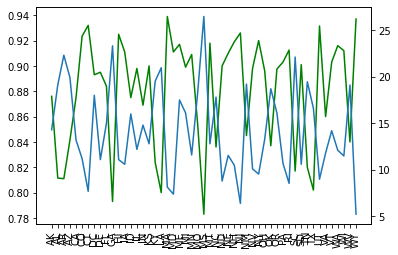

<Figure size 10800x720 with 0 Axes>

<Figure size 1600x2080 with 0 Axes>

<Figure size 10800x720 with 0 Axes>

<Figure size 10800x720 with 0 Axes>

In [22]:
x1 = plt.gca()
x2 = x1.twinx()
x1.plot(df_pct_completed_hs.groupby('Geographic Area').median().values, color='green')
x2.plot(df_pct_poverty.groupby('Geographic Area').median())
x1.set_xticklabels(rotation = (90), fontsize = 10, labels=df_pct_completed_hs.groupby('Geographic Area').median().index)
x1.set_xticklabels(rotation = (90), fontsize = 10, labels=df_pct_completed_hs.groupby('Geographic Area').median().index )
plt.figure(figsize=(150,10)) 
xtick_loc = [  0.5 + i for i in range(0, len(df_pct_completed_hs.groupby('Geographic Area').median().index) )]
plt.figure(figsize=(20, 26), dpi=80)
plt.show()
plt.figure(figsize=(150,10)) 


In [23]:
print(df_pct_completed_hs.groupby('Geographic Area').median())
df_pct_poverty.groupby('Geographic Area').median()

                 number
Geographic Area        
AK                 0.88
AL                 0.81
AR                 0.81
AZ                 0.84
CA                 0.88
CO                 0.92
CT                 0.93
DC                 0.89
DE                 0.90
FL                 0.88
GA                 0.79
HI                 0.93
IA                 0.91
ID                 0.88
IL                 0.90
IN                 0.87
KS                 0.90
KY                 0.82
LA                 0.80
MA                 0.94
MD                 0.91
ME                 0.92
MI                 0.90
MN                 0.91
MO                 0.85
MS                 0.78
MT                 0.92
NC                 0.84
ND                 0.90
NE                 0.91
NH                 0.92
NJ                 0.93
NM                 0.84
NV                 0.90
NY                 0.92
OH                 0.90
OK                 0.84
OR                 0.90
PA                 0.90
RI              

,poverty_rate
Geographic Area,
AK,14.30
AL,19.10
AR,22.30
AZ,19.90
CA,13.20
CO,11.20
CT,7.70
DC,18.00
DE,11.10


In [24]:
grp_df = df_pct_completed_hs.groupby('Geographic Area', as_index=False).median()
grp_df.info()
# grp_df.sort_values('number', inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  51 non-null     object 
 1   number           51 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [25]:
grp_df['poverty_rate'] = df_pct_poverty['poverty_rate']
grp_df['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'])
# type(grp_df['Geographic Area'][0])
grp_df

,Geographic Area,number,poverty_rate,percent_completed_hs
0,AK,0.88,78.80,21.20
1,AL,0.81,29.10,69.10
2,AR,0.81,25.50,78.90
3,AZ,0.84,30.70,81.40
4,CA,0.88,42.00,68.60
5,CO,0.92,11.20,89.30
6,CT,0.93,26.70,72.70
7,DC,0.89,30.40,78.10
8,DE,0.90,9.70,88.80
9,FL,0.88,41.30,74.30


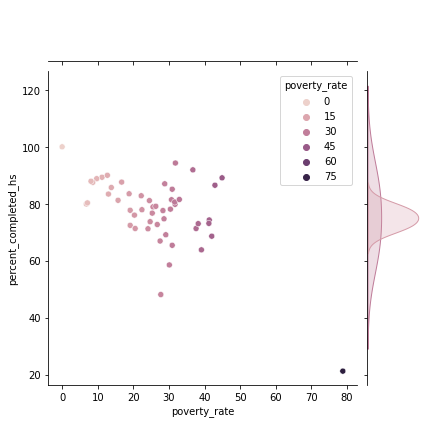

In [26]:
grp_df
# sns.jointplot(x = grp_df.index, y = grp_df.values ,kind = "kde", data = grp_df)
sns.jointplot(data= grp_df, x= 'poverty_rate' , y= 'percent_completed_hs', hue= 'poverty_rate', kind='scatter') 

In [27]:
grp_df

,Geographic Area,number,poverty_rate,percent_completed_hs
0,AK,0.88,78.80,21.20
1,AL,0.81,29.10,69.10
2,AR,0.81,25.50,78.90
3,AZ,0.84,30.70,81.40
4,CA,0.88,42.00,68.60
5,CO,0.92,11.20,89.30
6,CT,0.93,26.70,72.70
7,DC,0.89,30.40,78.10
8,DE,0.90,9.70,88.80
9,FL,0.88,41.30,74.30


#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

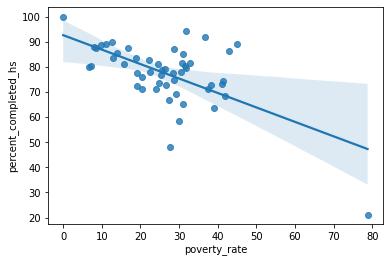

In [28]:
sns.regplot(data=grp_df, x='poverty_rate', y='percent_completed_hs')  

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [29]:
df_share_race_city.replace('(X)','0',inplace=True)

In [30]:
df_share_race_city.loc[630]

Geographic area                   AK
City                     Chisana CDP
share_white                        0
share_black                        0
share_native_american              0
share_asian                        0
share_hispanic                     0
Name: 630, dtype: object

In [31]:
df_share_race_city['share_white'] = pd.to_numeric(df_share_race_city['share_white'])
df_share_race_city['share_black'] = pd.to_numeric(df_share_race_city['share_black'])
df_share_race_city['share_native_american'] = pd.to_numeric(df_share_race_city['share_native_american'])
df_share_race_city['share_asian'] = pd.to_numeric(df_share_race_city['share_asian'])
df_share_race_city['share_hispanic'] = pd.to_numeric(df_share_race_city['share_hispanic'])

In [32]:
grp_df = df_share_race_city.groupby('Geographic area').median()

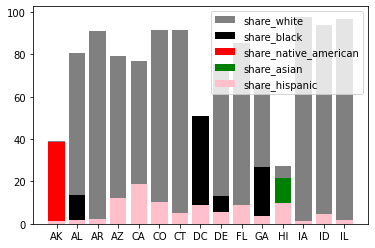

In [33]:
plt.bar(grp_df.index[:15], grp_df.share_white[:15], color='grey')
plt.bar(grp_df.index[:15], grp_df.share_black[:15], color='black')
plt.bar(grp_df.index[:15], grp_df.share_native_american[:15], color='red')
plt.bar(grp_df.index[:15], grp_df.share_asian[:15], color='green')
plt.bar(grp_df.index[:15], grp_df.share_hispanic[:15], color='pink')
plt.legend(['share_white', 'share_black', 'share_native_american','share_asian','share_hispanic'])


# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [34]:
df_share_race_city.describe()

,share_white,share_black,share_native_american,share_asian,share_hispanic
count,"29,268.00","29,268.00","29,268.00","29,268.00","29,268.00"
mean,83.16,6.83,2.87,1.54,9.32
std,21.76,15.61,12.67,4.29,17.57
min,0.00,0.00,0.00,0.00,0.00
25%,78.50,0.10,0.10,0.00,1.20
50%,92.50,0.80,0.30,0.40,2.90
75%,96.90,4.20,0.90,1.20,8.00
max,100.00,100.00,100.00,67.10,100.00


In [35]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,0,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,0.00,M,0,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,0,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


In [36]:
vc = df_fatalities.value_counts('race')
vc

race
W    1201
B     618
H     423
0     195
A      39
N      31
O      28
dtype: int64

In [37]:
px.pie(df_fatalities, vc.index, vc.values )

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [38]:
g2 = df_fatalities.value_counts('gender')

In [39]:
px.pie(data_frame=df_fatalities, names=g2.index, values=g2.values)

In [40]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,0,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,0.00,M,0,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,0,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

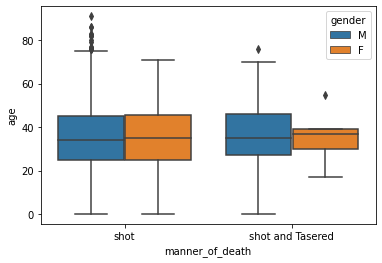

In [41]:
sns.boxplot(data=df_fatalities, x='manner_of_death', y='age', hue='gender')

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [42]:
values = df_fatalities.value_counts('armed')
values_data_frame = pd.DataFrame({
    'index': values.index,
    'values': values.values,
})
count_df= df_fatalities.groupby('armed').count()
count_df

,id,name,date,manner_of_death,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
armed,,,,,,,,,,,,,
0,9,9,9,9,9,9,9,9,9,9,9,9,9
Taser,9,9,9,9,9,9,9,9,9,9,9,9,9
air conditioner,1,1,1,1,1,1,1,1,1,1,1,1,1
ax,9,9,9,9,9,9,9,9,9,9,9,9,9
baseball bat,8,8,8,8,8,8,8,8,8,8,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
toy weapon,104,104,104,104,104,104,104,104,104,104,104,104,104
unarmed,171,171,171,171,171,171,171,171,171,171,171,171,171
undetermined,117,117,117,117,117,117,117,117,117,117,117,117,117


In [43]:
count_df['percentage'] = count_df['id'] *100 / float(sum(count_df['id']))
count_df

,id,name,date,manner_of_death,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,percentage
armed,,,,,,,,,,,,,,
0,9,9,9,9,9,9,9,9,9,9,9,9,9,0.36
Taser,9,9,9,9,9,9,9,9,9,9,9,9,9,0.36
air conditioner,1,1,1,1,1,1,1,1,1,1,1,1,1,0.04
ax,9,9,9,9,9,9,9,9,9,9,9,9,9,0.36
baseball bat,8,8,8,8,8,8,8,8,8,8,8,8,8,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
toy weapon,104,104,104,104,104,104,104,104,104,104,104,104,104,4.10
unarmed,171,171,171,171,171,171,171,171,171,171,171,171,171,6.75
undetermined,117,117,117,117,117,117,117,117,117,117,117,117,117,4.62


In [44]:
fig = px.bar(data_frame = count_df, x=count_df.index, y=count_df['percentage'], height=500)
fig.show()
# count_df['id'].plot(kind='bar', figsize=(12, 8), values=)

In [45]:
new_df = df_fatalities[df_fatalities['armed'] != 'unarmed']
new_df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
5,11,Kenneth Joe Brown,04/01/15,shot,gun,18.00,M,W,Guthrie,OK,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,0,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,0.00,M,0,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,0,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


In [46]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,0,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,0.00,M,0,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,0,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [47]:
age_percent = df_fatalities[df_fatalities['age'] < 25].age
percent = round(len(age_percent) *100 / len(df_fatalities.age), 2)
percent

20.79

In [48]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,0,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,0.00,M,0,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,0,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

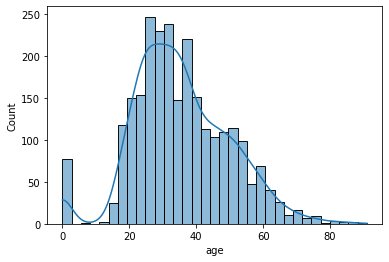

In [49]:
sns.histplot(data= df_fatalities, x=df_fatalities.age, kde=True)

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

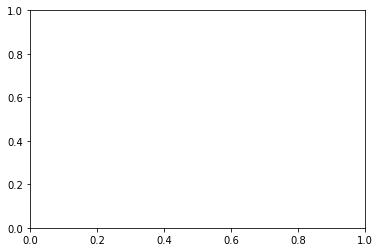

In [50]:
sns.kdeplot()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [51]:
gb = df_fatalities.groupby('race').count()
gb

,id,name,date,manner_of_death,armed,age,gender,city,state,signs_of_mental_illness,threat_level,flee,body_camera
race,,,,,,,,,,,,,
0,195,195,195,195,195,195,195,195,195,195,195,195,195
A,39,39,39,39,39,39,39,39,39,39,39,39,39
B,618,618,618,618,618,618,618,618,618,618,618,618,618
H,423,423,423,423,423,423,423,423,423,423,423,423,423
N,31,31,31,31,31,31,31,31,31,31,31,31,31
O,28,28,28,28,28,28,28,28,28,28,28,28,28
W,1201,1201,1201,1201,1201,1201,1201,1201,1201,1201,1201,1201,1201


In [52]:
px.bar(data_frame=gb, x=gb.index, y=gb.id, labels={'id':'Number of deaths'})

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [53]:
per_ill = len(df_fatalities[df_fatalities['signs_of_mental_illness']==True].race)*100/len(df_fatalities['signs_of_mental_illness'])

In [54]:
print(f'percentage of people died by mental illness are {round(per_ill,1)}%')

percentage of people died by mental illness are 25.0%


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [55]:
gb_city = df_fatalities.groupby(['city','race'], as_index=False).count()
sort_gb_city = gb_city.sort_values('name', ascending=False)
sort_gb_city

,city,race,id,name,date,manner_of_death,armed,age,gender,state,signs_of_mental_illness,threat_level,flee,body_camera
295,Chicago,B,21,21,21,21,21,21,21,21,21,21,21,21
921,Los Angeles,H,19,19,19,19,19,19,19,19,19,19,19,19
722,Houston,B,15,15,15,15,15,15,15,15,15,15,15,15
84,Austin,W,13,13,13,13,13,13,13,13,13,13,13,13
1402,San Antonio,H,12,12,12,12,12,12,12,12,12,12,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,Greenwood,W,1,1,1,1,1,1,1,1,1,1,1,1
645,Greenville,W,1,1,1,1,1,1,1,1,1,1,1,1
643,Greenville,0,1,1,1,1,1,1,1,1,1,1,1,1
642,Greensboro,W,1,1,1,1,1,1,1,1,1,1,1,1


In [56]:
sort_gb_city[:10]

,city,race,id,name,date,manner_of_death,armed,age,gender,state,signs_of_mental_illness,threat_level,flee,body_camera
295,Chicago,B,21,21,21,21,21,21,21,21,21,21,21,21
921,Los Angeles,H,19,19,19,19,19,19,19,19,19,19,19,19
722,Houston,B,15,15,15,15,15,15,15,15,15,15,15,15
84,Austin,W,13,13,13,13,13,13,13,13,13,13,13,13
1402,San Antonio,H,12,12,12,12,12,12,12,12,12,12,12,12
1255,Phoenix,W,12,12,12,12,12,12,12,12,12,12,12,12
1253,Phoenix,H,11,11,11,11,11,11,11,11,11,11,11,11
354,Columbus,B,11,11,11,11,11,11,11,11,11,11,11,11
1529,St. Louis,B,11,11,11,11,11,11,11,11,11,11,11,11
1684,Washington,B,10,10,10,10,10,10,10,10,10,10,10,10


In [57]:
px.bar(data_frame=sort_gb_city[:10], x=sort_gb_city[:10].city, y=sort_gb_city[:10].name, labels={'x':'city','y':'Number of deaths'}) 

In [58]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,0,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,0.00,M,0,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,0,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [59]:
px.bar(data_frame=sort_gb_city[:10], x=sort_gb_city[:10].city, y=sort_gb_city[:10].name, labels={'x':'city','y':'Number of deaths'}, color='race') 

In [60]:
df_state = df_fatalities.groupby('state').count()
df_state

,id,name,date,manner_of_death,armed,age,gender,race,city,signs_of_mental_illness,threat_level,flee,body_camera
state,,,,,,,,,,,,,
AK,15,15,15,15,15,15,15,15,15,15,15,15,15
AL,50,50,50,50,50,50,50,50,50,50,50,50,50
AR,26,26,26,26,26,26,26,26,26,26,26,26,26
AZ,118,118,118,118,118,118,118,118,118,118,118,118,118
CA,424,424,424,424,424,424,424,424,424,424,424,424,424
CO,74,74,74,74,74,74,74,74,74,74,74,74,74
CT,9,9,9,9,9,9,9,9,9,9,9,9,9
DC,11,11,11,11,11,11,11,11,11,11,11,11,11
DE,8,8,8,8,8,8,8,8,8,8,8,8,8


# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [61]:
pip install pycountry

     |████████████████████████████████| 10.1 MB 5.1 MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746883 sha256=76b5334d5da63e71d20749e073f4327fa73f66347184871e58a09bb982d84063
  Stored in directory: /root/.cache/pip/wheels/57/e8/3f/120ccc1ff7541c108bc5d656e2a14c39da0d824653b62284c6
Successfully built pycountry


In [62]:
pip install iso3166

In [63]:
from iso3166 import countries
from iso3166 import countries_by_alpha2

In [64]:
countries_by_alpha2.get('NY')

In [65]:
fig = px.choropleth(df_state, locations=df_state.index, color='name', color_continuous_scale=px.colors.sequential.Plasma, locationmode='USA-states', scope='usa')
fig.show()

In [66]:
gp_poverty = df_pct_poverty.groupby('Geographic Area').count()
gp_poverty
px.choropleth(data_frame= gp_poverty, locationmode='USA-states', scope='usa', locations=gp_poverty.index, color=gp_poverty.poverty_rate)

In [67]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,0,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,0.00,M,0,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,0,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [68]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])

In [85]:
for i in range(0, len(df_fatalities.date)):
  df_fatalities['time'][i] = str(df_fatalities['date'][i].year)+'-'+str(df_fatalities['date'][i].month)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [86]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,time
0,3,Tim Elliot,2015-02-01,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False,2015-2
1,4,Lewis Lee Lembke,2015-02-01,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False,2015-2
2,5,John Paul Quintero,2015-03-01,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False,2015-3
3,8,Matthew Hoffman,2015-04-01,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False,2015-4
4,9,Michael Rodriguez,2015-04-01,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False,2015-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,2017-07-28,shot,gun,31.00,M,0,Kansas City,MO,False,attack,Not fleeing,False,2017-7
2531,2813,TK TK,2017-07-28,shot,vehicle,0.00,M,0,Albuquerque,NM,False,attack,Car,False,2017-7
2532,2818,Dennis W. Robinson,2017-07-29,shot,gun,48.00,M,0,Melba,ID,False,attack,Car,False,2017-7
2533,2817,Isaiah Tucker,2017-07-31,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True,2017-7


In [88]:
gb_time = df_fatalities.groupby('time').count()
gb_time

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
time,,,,,,,,,,,,,,
2015-1,70,70,70,70,70,70,70,70,70,70,70,70,70,70
2015-10,89,89,89,89,89,89,89,89,89,89,89,89,89,89
2015-11,80,80,80,80,80,80,80,80,80,80,80,80,80,80
2015-12,85,85,85,85,85,85,85,85,85,85,85,85,85,85
2015-2,78,78,78,78,78,78,78,78,78,78,78,78,78,78
2015-3,87,87,87,87,87,87,87,87,87,87,87,87,87,87
2015-4,88,88,88,88,88,88,88,88,88,88,88,88,88,88
2015-5,85,85,85,85,85,85,85,85,85,85,85,85,85,85
2015-6,68,68,68,68,68,68,68,68,68,68,68,68,68,68


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



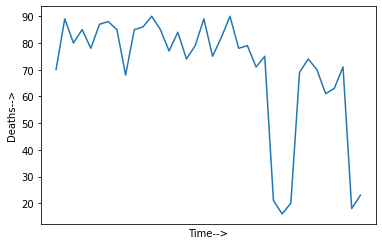

In [132]:
plt.plot(gb_time.index, gb_time.name)
plt.xticks([]) 
plt.xlabel('Time-->')
plt.ylabel('Deaths-->')
ax=plt.axes()
ax.xaxis.set_major_locator()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).